In [153]:
import numpy as np
import matplotlib.pyplot as plt

In [154]:
from pathlib import Path
import sys

try:
    ROOT = Path().resolve().parents[1]
    assert (ROOT / "common").exists()
except AssertionError:
    ROOT = next(p for p in Path().resolve().parents if (p / "common").exists())

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

In [155]:
#print(ROOT)

In [156]:
from common import sensors as sn 
from common import subspace_methods as sm
from common import em_tools as em
from common import log_funcs as lf

In [157]:
DIST_RATIO = 0.5

In [158]:
Num_sensors1 = 40
Num_emitters1 = 2
sample_size1 = 20

failing_sensors1 = np.arange(20)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([-0.5, 0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах

signal_1_db = 0.8
#signal_1_db = 0.5
signal_2_db = 1

noise_db = 4

signal_1_var = sn.db_to_var(signal_1_db)
signal_2_var = sn.db_to_var(signal_2_db)
noise_var = sn.db_to_var(noise_db)

P1 = np.diag([signal_1_var, signal_2_var]) # Ковариация сигналов
Q1 = noise_var * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)
#MUSIC_theta1 = np.array([-0.54, 0.74])

In [159]:
print(f"theta1_rad={theta1_rad}")
print(f"P1={P1}")

theta1_rad=[-0.5  0.7]
P1=[[1.20226443 0.        ]
 [0.         1.25892541]]


In [160]:
print(f"MUSIC_theta1={MUSIC_theta1}")

MUSIC_theta1=[-0.50614548  0.70685835]


In [161]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(19.608975871669443)

In [162]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em.multistart_EM(X1_with_mv, 
                                                                        Num_emitters1, 
                                                                        Q=Q1,
                                                                        theta_guess=MUSIC_theta1, 
                                                                        num_of_starts=1, 
                                                                        max_iter=50, 
                                                                        rtol_params=1e-3,
                                                                        rtol_lkhd=1e-6,
                                                                        reg_coef=1e-6)

0-th start
theta=[-0.50614548  0.70685835],P=[[1.34277410e-07-3.38411324e-24j 0.00000000e+00+0.00000000e+00j]
 [0.00000000e+00+0.00000000e+00j 9.69192472e-08+3.15958273e-24j]]
Inital likelihood = -1709.1104792959395
Iteration=1
new_angles=[-0.50614548  0.70685835]
likelihood is -1709.1042437447834 on iteration 1.
Iteration=2
new_angles=[-0.50502927  0.70557479]
likelihood is -1709.097688822725 on iteration 2.
Iteration=3
new_angles=[-0.50391375  0.70429263]
likelihood is -1709.0910317373434 on iteration 3.
Iteration=4
new_angles=[-0.50391375  0.70429263]
likelihood is -1709.0844767654503 on iteration 4.
Iteration=5
new_angles=[-0.50391375  0.70429263]
likelihood is -1709.0779046635735 on iteration 5.
Iteration=6
new_angles=[-0.50335624  0.70365207]
likelihood is -1709.0711741168054 on iteration 6.
Iteration=7
new_angles=[-0.50279891  0.70301186]
likelihood is -1709.0643946780813 on iteration 7.
Iteration=8
new_angles=[-0.50224175  0.702372  ]
likelihood is -1709.0575708418671 on iterat

In [163]:
EM_theta1_rad, EM_P1

(array([-0.500377  ,  0.70079244]),
 array([[9.46197183e-05+0.00000000e+00j, 7.89608116e-07-1.63213446e-06j],
        [7.89608116e-07+1.63213446e-06j, 7.86496400e-05+0.00000000e+00j]]))

In [164]:
angles_list1

[array([-0.50614548,  0.70685835]),
 array([-0.50614548,  0.70685835]),
 array([-0.50502927,  0.70557479]),
 array([-0.50391375,  0.70429263]),
 array([-0.50391375,  0.70429263]),
 array([-0.50391375,  0.70429263]),
 array([-0.50335624,  0.70365207]),
 array([-0.50279891,  0.70301186]),
 array([-0.50224175,  0.702372  ]),
 array([-0.50224175,  0.702372  ]),
 array([-0.50168476,  0.70173249]),
 array([-0.50140632,  0.70141286]),
 array([-0.50140632,  0.70141286]),
 array([-0.50140632,  0.70141286]),
 array([-0.50140632,  0.70141286]),
 array([-0.50140632,  0.70141286]),
 array([-0.50112793,  0.70109332]),
 array([-0.50112793,  0.70109332]),
 array([-0.50112793,  0.70109332]),
 array([-0.50097496,  0.70105803]),
 array([-0.50082201,  0.70102274]),
 array([-0.50066906,  0.70098745]),
 array([-0.50051613,  0.70095216]),
 array([-0.50051613,  0.70095216]),
 array([-0.50051613,  0.70095216]),
 array([-0.50051613,  0.70095216]),
 array([-0.50051613,  0.70095216]),
 array([-0.50051613,  0.7009

In [165]:
np.array(angles_list1)

array([[-0.50614548,  0.70685835],
       [-0.50614548,  0.70685835],
       [-0.50502927,  0.70557479],
       [-0.50391375,  0.70429263],
       [-0.50391375,  0.70429263],
       [-0.50391375,  0.70429263],
       [-0.50335624,  0.70365207],
       [-0.50279891,  0.70301186],
       [-0.50224175,  0.702372  ],
       [-0.50224175,  0.702372  ],
       [-0.50168476,  0.70173249],
       [-0.50140632,  0.70141286],
       [-0.50140632,  0.70141286],
       [-0.50140632,  0.70141286],
       [-0.50140632,  0.70141286],
       [-0.50140632,  0.70141286],
       [-0.50112793,  0.70109332],
       [-0.50112793,  0.70109332],
       [-0.50112793,  0.70109332],
       [-0.50097496,  0.70105803],
       [-0.50082201,  0.70102274],
       [-0.50066906,  0.70098745],
       [-0.50051613,  0.70095216],
       [-0.50051613,  0.70095216],
       [-0.50051613,  0.70095216],
       [-0.50051613,  0.70095216],
       [-0.50051613,  0.70095216],
       [-0.50051613,  0.70095216],
       [-0.50051613,

In [166]:
lf.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q1), lf.incomplete_lkhd(X1_with_mv, theta1_rad, P1, Q1)

(np.float64(-1708.5287403742252), np.float64(-1262.9023662453574))

In [167]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [168]:
x_grid = np.arange(1,52,5)

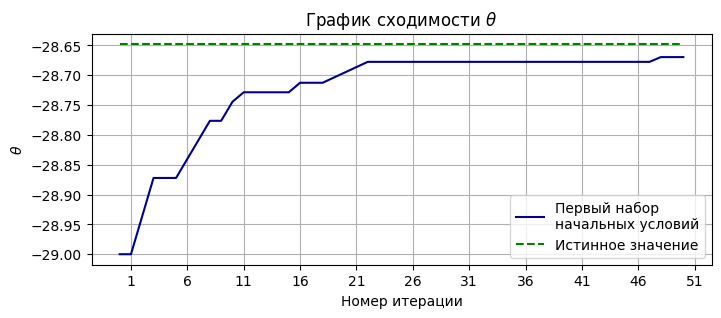

In [169]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1[:,0],color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg[0], angles_list1.shape[0]), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

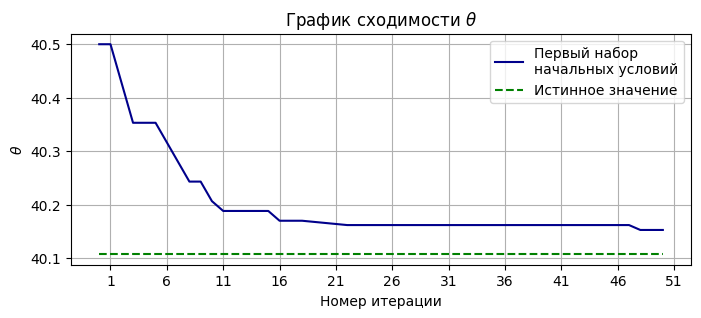

In [170]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1[:,1],color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg[1], angles_list1.shape[0]), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

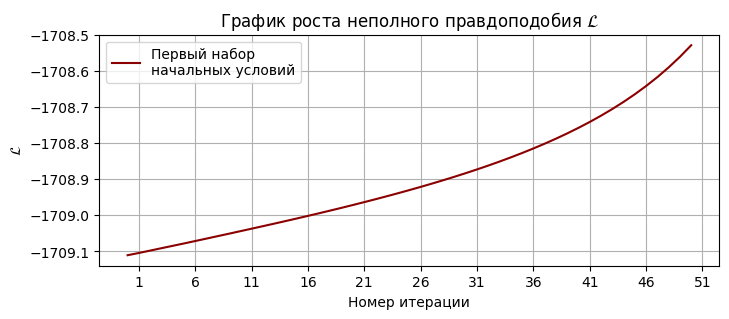

In [171]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()